
# Clustering individuals as per their demographics

In this case study, we will use clustering methods to identify different types of investors.

## 1. Problem Definition

The goal of this case study is to build a machine learning model to cluster individuals/investors based on the parameters related to the ability and willingness to take risk. We will focus on using common demographic and financial characteristics to accomplish this.

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve Board, which has been used in the case studies in chapter 5 and chapter 6. 

## 2. Loading data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

The dataset is same as the dataset used, which is further processed to give the following attributes for different investors for the year 2007.

In [2]:
# load dataset
dataset = pd.read_excel(r'C:\Users\roosd\Downloads\econometrie jaar 3\MIF course\ProcessedData.xlsx')

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

## 3. Exploratory data analysis

In [4]:
# shape
dataset.shape

(3866, 13)

In [5]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


As we can see in the table above, there are 12 attributes for each of the individuals. These attributes can be categorized as demographic, financial and behavioral attributes. 

In [7]:
# describe data
set_option('display.precision', 3)
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000
mean,1933.500,3.107,2.906,1.353,0.938,3.697,1.742,3.043,0.717,2.446,3.561,2.976,3.671
std,1116.162,1.513,1.066,0.478,1.249,1.618,0.934,0.879,0.451,0.743,1.304,1.463,1.184
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,967.250,2.000,2.000,1.000,0.000,3.000,1.000,2.000,0.000,2.000,2.000,2.000,3.000
50%,1933.500,3.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,3.000,4.000,3.000,4.000
75%,2899.750,4.000,4.000,2.000,2.000,5.000,3.000,4.000,1.000,3.000,5.000,4.000,5.000
max,3866.000,6.000,4.000,2.000,8.000,6.000,4.000,4.000,1.000,3.000,5.000,5.000,5.000


Let us look at the correlation. We will take a detailed look into the visualization post clustering.

<Axes: title={'center': 'Correlation Matrix'}>

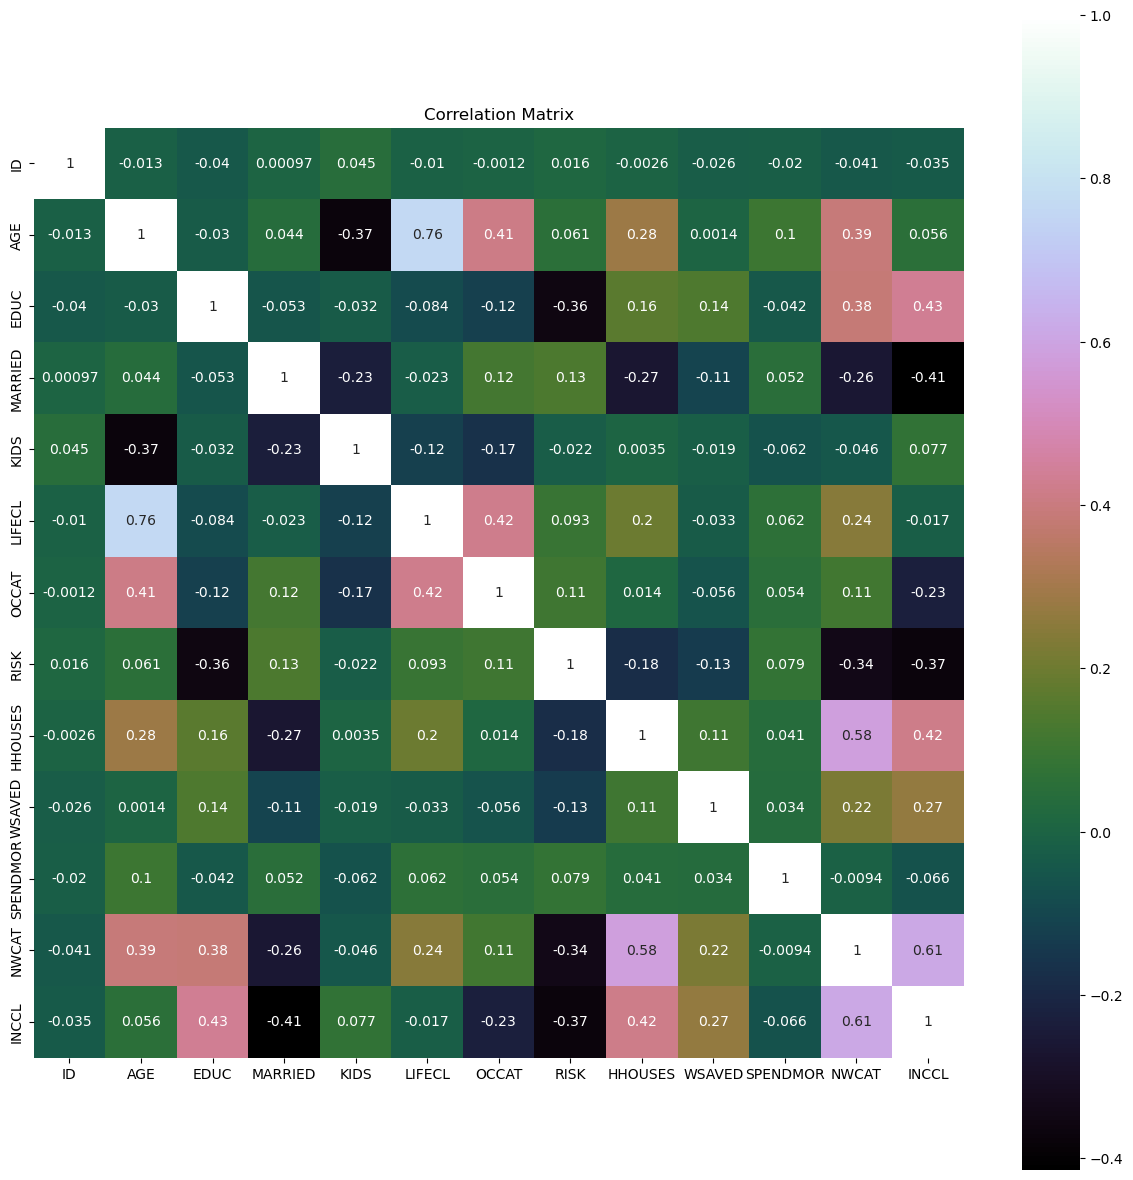

In [8]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

## 4. Data preparation

Data cleaning: Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

In [9]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed. The ID column which is not needed is dropped.

In [10]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


The data available is comprised of attributes with similar scale. Hence no data transformation is required. 

## 5. Evaluate algorithms and models

In this step, we will look at the following models and perform further analysis and visualization.

1. K-means
2. Affinity Propagation

### K-means clustering

In this step we look at the following metrices to get the optimum number of clusters

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

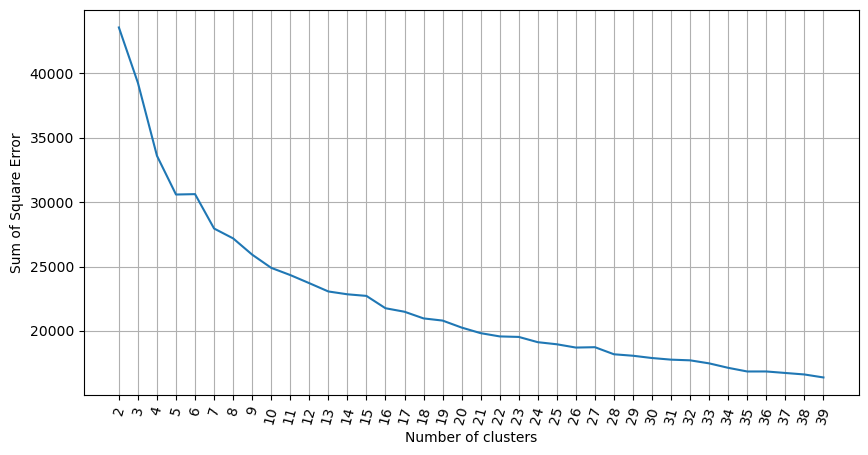

In [11]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

Silhouette score

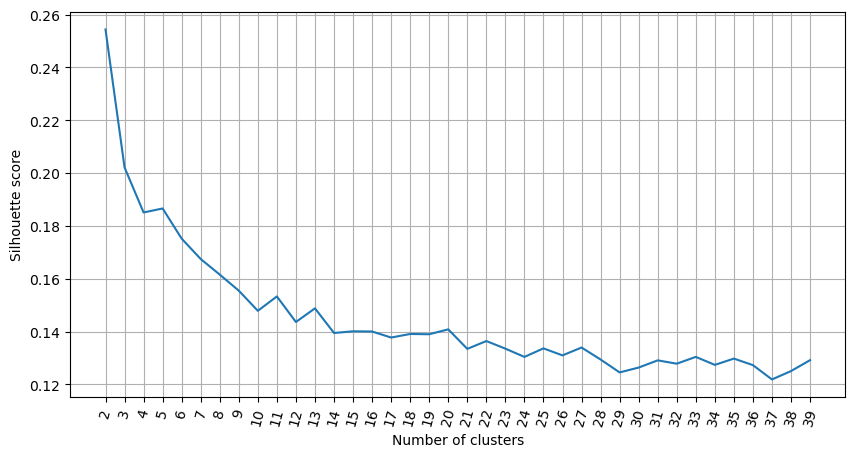

In [13]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)

Looking at both the charts above, the optimum number of clusters seem to be around 7. We can see that as the number of clusters increase pass 6, the sum of square of
errors within clusters plateaus off. From the second graph, we can see that there are
various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would use 7 clusters in the k-means model below.

In [14]:
nclust=7

In [15]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

,n_clusters,7
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [16]:
#Extracting labels 
target_labels = k_means.predict(X)

### Affinity propagation

In [17]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [18]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 161


### CLuster evaluation

We evaluate the clusters using Silhouette Coefficient (sklearn.metrics.silhouette_score). Higher Silhouette Coefficient score means a model with better defined clusters.

In [19]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.170585217843582
ap 0.09742783882420636


k-means has much higher Silhouette Coefficient as compared to the affinity propagation. 

## 6. Cluster intuition

In the next step, we will check each cluster and understand the intuition behind the clusters. 

In [20]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,2.520,3.610,1.102,2.307,3.147,1.480,2.502,0.952,2.686,3.519,4.294,4.717
1,4.666,3.458,1.226,0.299,5.351,2.077,2.745,0.942,2.624,3.551,4.515,4.506
2,2.355,3.349,1.336,0.169,1.833,1.334,2.683,0.865,2.647,3.745,3.589,4.375
3,1.811,2.746,1.649,0.002,1.354,1.627,3.226,0.323,2.367,3.462,1.527,2.744
4,1.983,2.525,1.252,1.971,3.288,1.390,3.225,0.571,2.245,1.874,1.913,3.380
5,1.874,2.350,1.354,2.124,3.373,1.452,3.416,0.475,2.205,4.426,1.657,3.024
6,4.839,2.158,1.579,0.189,5.621,2.371,3.552,0.709,2.270,3.905,2.362,2.674


### Demographics features

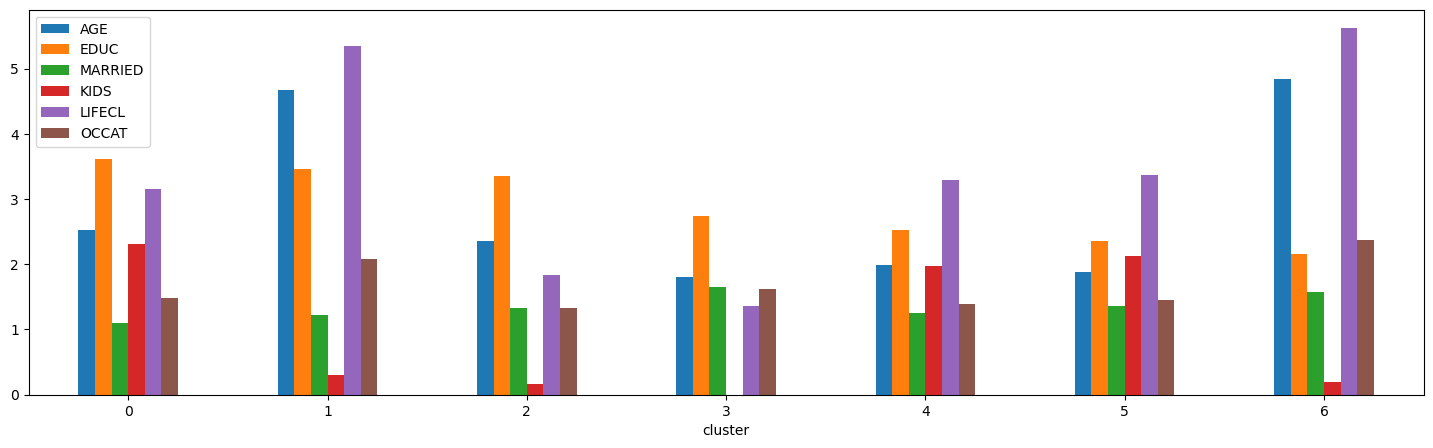

In [21]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));

The plot here shows the average value of the attributes for each of the clusters. For
example, comparing cluster 0 and cluster 1, cluster 0 has lower average age, yet higher
average education. In terms of marriage and number of children, these two clusters
are similar. So, the individuals in cluster 0 will on an average have higher risk toler‐
ance as compared to the individuals in cluster 1, based on the demographic attributes.

### Financial Features and Features related to willingness to take risk

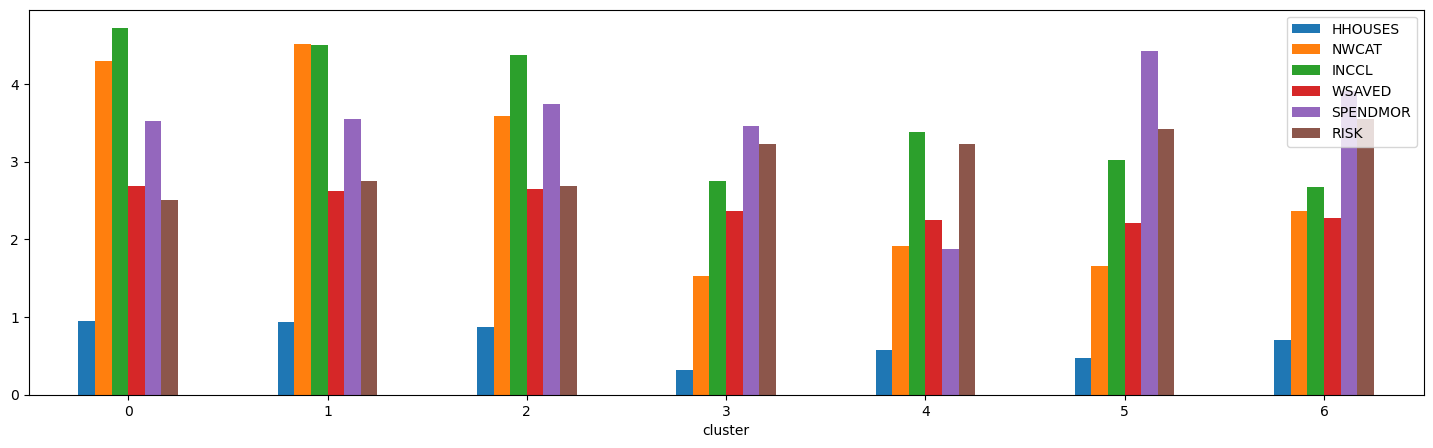

In [22]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

The plot here shows the average value of the attributes for each of the cluster on the
financial and behavioral attributes. For example, comparing cluster 0 and cluster 1,
cluster 0 has higher average house ownership, higher average net worth and income,
and a lower willingness to take risk. In terms of saving vs. income comparison and
willingness to save, the two clusters are comparable. Therefore, we can posit that the
individuals in cluster 0 will, on average, have a higher ability, yet lower willingness, to
take risk compared with cluster 1.

<Axes: xlabel='cluster'>

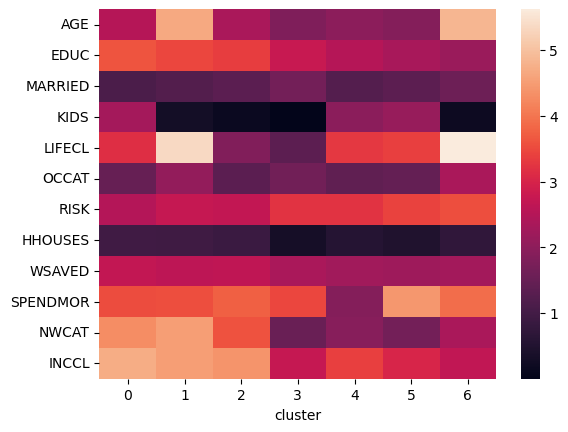

In [23]:
sns.heatmap(output.T)

Combining the information from the demographics, financial, and behavioral
attributes for cluster 0 and cluster 1, the overall ability to take risk for individual clus‐
ter 0 is higher as compared to cluster 1. Performing similar analysis across all other
clusters, we summarize the results in the table below. The risk tolerance column rep‐
resents the subjective assessment of the risk tolerance of each of the clusters.

| Cluster| Features | Risk Capacity |
| --- | --- | --- |
| Cluster 0	 | Low Age, High Networth and Income, Less risky life category, willingness to spend more | High |
| Cluster 1	 | High Age, low net worth and Income, highly risky life category, Willing ness to take risk, low education | High |
| Cluster 2	 | High Age, high net worth and Income, highly risky life category, Willing ness to to take risk, own house | Medium |
| Cluster 3	 | 	Low age, very low income and net worth, high willingness to take risk, many kids | Low |
| Cluster 4	 | Medium age, very high income and net worth, high willingness to take risk, many kids, own house | High |
| Cluster 5	 | Low age, very low income and net worth, high willingness to take risk, no kids | Medium |
| Cluster 6	 | Low age, medium income and net worth, high willingness to take risk, many kids, own house | Low |


**_Conclusion_**

One of the key takeaways from this case study is the approach to understand the cluster intuition. We used visualization techniques to understand the expected behavior of a cluster member by qualitatively interpreting mean values of the variables in each
cluster. 

We demonstrate the efficiency of the clustering technique in discovering the natural intuitive groups of different investors based on their risk tolerance.

Given, the clustering algorithms can successfully group investors based on different factors, such as age, income, and risk tolerance, it can further
used by portfolio managers to understand the investor’s behavior and standardize the portfolio allocation and rebalancing across the clusters, making the investment management process faster and effective.